### Exploring the relationship between different services of a villa and the prices of the villa

## by (Muhammad Abdullahi Said)

## Investigation Overview


> In this investigation, I wanted to look at the relationship between different services of a villa and prices of the villas. To see if the prices are anyway related to the services.



## Dataset Overview

> The dataset contains the details of 977 villas with 38 attributes. Most variables are categorical in nature, but the variables area, price, age of property, locality score, project score and builders experience are numerical variables. Some outliers like age of property (with 122 years) and builders experience (greater than 250) were removed. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Missing Value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
%%time
start='\033[1m'
end='\033[0;0m'

CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
# load in the dataset into a pandas dataframe
df= pd.read_csv("C:/Users/Modern Shelter/Downloads/archive/output_Pune_villa.csv")

In [4]:
df["description"] = df["description"].fillna("unknown")
df["facing"] = df["facing"].fillna("unknown")
df = df.dropna(subset=['location'])

In [5]:
zero_null_features =["Intercom",'status', "Indoor Games", "ATM", "Maintenance Staff", "Staff Quarter", "Multipurpose Room", "Car Parking", "Hospital", "School", "Shopping Mall", "Vaastu Compliant", "Cafeteria", "Rain Water Harvesting", "Golf Course", "security_deposit"]
df[zero_null_features] = df[zero_null_features].fillna(0.0)

In [6]:
impute_it = IterativeImputer()
impute_data = impute_it.fit_transform(df[['locality_score', 'project_score', 'builder_experience']])
df[['locality_score', 'project_score', 'builder_experience']] = impute_data

In [7]:
df = df.drop(["security_deposit"], axis = 1)

In [8]:
#function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')

## Viewing the names of the column, their unique values and count

In [9]:
values_in_columns(df)

Column Name--->location
Number of Unique Values 103 

Count of each unique value 
 Lohegaon         164
Wagholi           85
Maval             72
Bavdhan           41
Baner             36
                ... 
Dhayari Phata      1
Bhosari            1
Akurdi             1
Warje              1
Pimple Nilakh      1
Name: location, Length: 103, dtype: int64 

Column Name--->area
Number of Unique Values 338 

Count of each unique value 
 3000    32
2500    25
1500    24
2000    24
965     23
        ..
1531     1
1584     1
3807     1
4062     1
522      1
Name: area, Length: 338, dtype: int64 

Column Name--->price
Number of Unique Values 299 

Count of each unique value 
 4997000     28
4998000     26
4999000     24
4995000     24
16000000    21
            ..
13300000     1
50900000     1
2600900      1
13500000     1
7398400      1
Name: price, Length: 299, dtype: int64 

Column Name--->price_currency
Number of Unique Values 1 

Count of each unique value 
 INR    977
Name: price_curren

In [10]:
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
    else:
        print("Dataframe doesn't contains dublicate Values")

In [11]:
duplicate(df)

Dataframe contains duplicate values 58
Details of dataframe after droping the Duplicate rows


## Describing the attributes
#### Here we look at the count, mean, std, min, 25%, 50%, 75% and the max of all the attributes.
#### we've switched it to transpose to show the whole attribute

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,919.0,2.649709e+03,1.566466e+03,522.0,1.518500e+03,2.350000e+03,3.300000e+03,11500.0
price,919.0,2.492829e+07,2.612990e+07,1800000.0,7.650000e+06,1.950000e+07,3.150000e+07,240000000.0
status,919.0,1.327530e-01,3.394923e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
new/resale,919.0,4.646355e-01,4.990194e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.0
price_negotiable,919.0,4.570185e-02,2.089514e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
furnished,919.0,1.751904e-01,3.803369e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0
age of property,919.0,3.165397e+00,6.302718e+00,0.0,0.000000e+00,0.000000e+00,5.000000e+00,122.0
Lift(s),919.0,3.841132e-01,4.866497e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.0
Full Power Backup,919.0,6.332971e-01,4.821668e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.0
24 X 7 Security,919.0,3.090316e-01,4.623458e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.0


<ol>
 <li><b>area:</b> Area of the villa range from 522 - 11,500. As Mean > Median, it's <b>rightly skewed</b>.</li>
 <li><b>price:</b> Our taget column value is in 1.8M - 240M range. As Mean > Median, it's <b>rightly skewed</b>.</li>
 <li><b>new/resale:</b> Representing whether a villa is new or a resale. It's a <b>Categorical Variable</b></li>
 <li><b>price_negotiable:</b> Representing whether a villa price is negotiable or not. It's a <b>Categorical Variable</b></li>
    <li><b>furnished:</b> Representing whether a villa is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>age of property:</b> Age of property range from 0 years - 122 years. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>locality_score:</b> Locality score range from 5.3 - 9.7. As Mean ~ Median, it's <b>almost normally distributed</b>.</li>
    <li><b>project_score:</b> Project score range from 6.7 - 8.8. As Mean ~ Median, it's <b>almost normally distributed</b>.</li>
    <li><b>builder_experience:</b> Builder experience range from 12 - 2022. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>Gymnasium:</b> Representing whether a villa has a gym or not. It's a <b>Categorical Variable</b></li>
    <li><b>24 X 7 Security:</b> Representing whether a villa has 24hr security or not. It's a <b>Categorical Variable</b></li>
    <li><b>Swimming Pool:</b> Representing whether a villa has a swimming pool or not. It's a <b>Categorical Variable</b></li>
    <li><b>Lift(s):</b> Representing whether a villa has a lift or not. It's a <b>Categorical Variable</b></li>
    <li><b>Jogging Track:</b> Representing whether a villa has a jogging track or not. It's a <b>Categorical Variable</b></li>
    <li><b>club house:</b> Representing whether a villa has a club house or not. It's a <b>Categorical Variable</b></li>
    <li><b>Landscaped Gardens:</b> Representing whether a villa has a garden pr not. It's a <b>Categorical Variable</b></li>
    <li><b>Rain Water Harvesting:</b> Representing whether a villa has a place for collecting water or not. It's a <b>Categorical Variable</b></li>
    <li><b>Sports Facility:</b> Representing whether a villa has a sport facility or not. It's a <b>Categorical Variable</b></li>
    <li><b>Car Parking:</b> Representing whether a villa has a car park or not. It's a <b>Categorical Variable</b></li>
    <li><b>Children's play area:</b> Representing whether a vila has a playground for children. It's a <b>Categorical Variable</b></li>
    <li><b>Full Power Backup:</b> Representing whether a villa has a power backup or not. It's a <b>Categorical Variable</b></li>
    <li><b>Vaastu Compliant:</b> Representing whether a villa has the capability to rid negative energy or not. It's a <b>Categorical Variable</b></li>
    <li><b>Indoor Games:</b> Representing whether a villa has Indoor games or not. It's a <b>Categorical Variable</b></li>
    <li><b>Intercom:</b> Representing whether a villa has an Intercom or not. It's a <b>Categorical Variable</b></li>
    <li><b>Maintenance Staff:</b> Representing whether a villa has a maintenance staff or not. It's a <b>Categorical Variable</b></li>
    <li><b>Shopping Mall:</b> Representing whether a villa has a shopping mall or not. It's a <b>Categorical Variable</b></li>
    <li><b>Cafeteria:</b> Representing whether a villa has a cafeteria or not. It's a <b>Categorical Variable</b></li>
    <li><b>ATM:</b> Representing whether a villa has an ATM Machine or not. It's a <b>Categorical Variable</b></li>
    <li><b>Multipurpose Room:</b> Representing whether a villa has a multipurpose room or not. It's a <b>Categorical Variable</b></li>
    <li><b>School:</b> Representing whether a villa has a school or not. It's a <b>Categorical Variable</b></li>
    <li><b>Hospital:</b> Representing whether a villa has a hospital or not. It's a <b>Categorical Variable</b></li>
    <li><b>Golf Course:</b> Representing whether a villa has a golf course or not. It's a <b>Categorical Variable</b></li>
    <li><b>Staff Quarter:</b> Representing whether a villa has a staff quarter or not. It's a <b>Categorical Variable</b></li>
    <li><b>status:</b> Representing whether a villa status is ready or not. It's a <b>Categorical Variable</b></li>
<ol>

## Creating a boxplot for all numerical columns
#### Here we use the boxplot to look at outliers in each attributes. From the figures below we found two attributes with outliers, age of property and builders experience

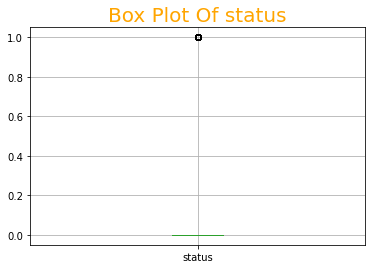

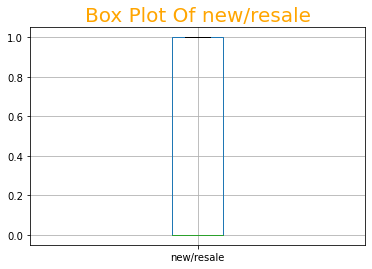

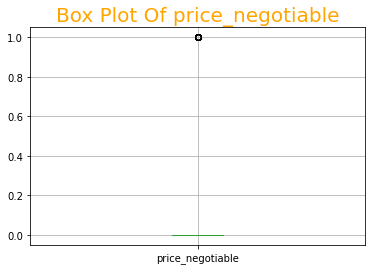

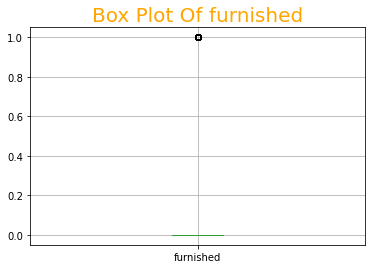

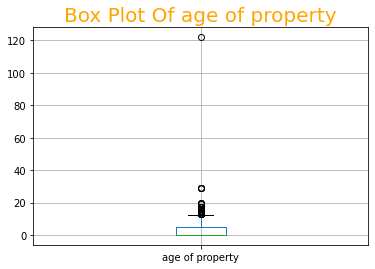

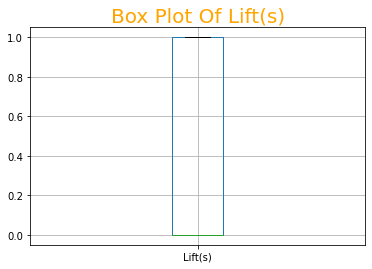

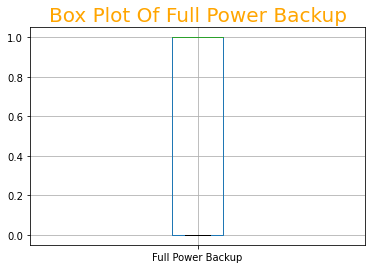

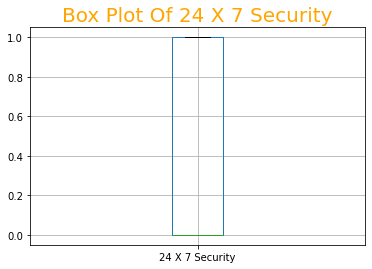

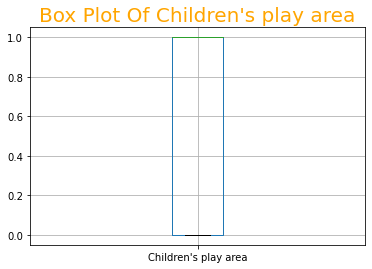

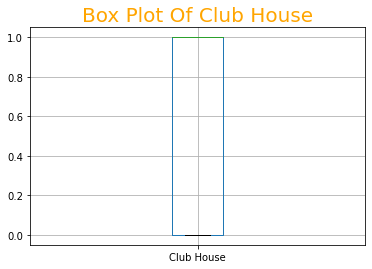

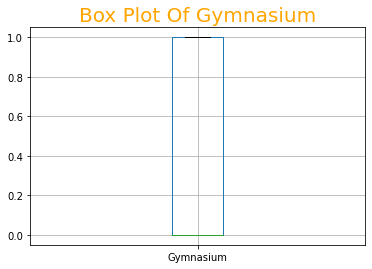

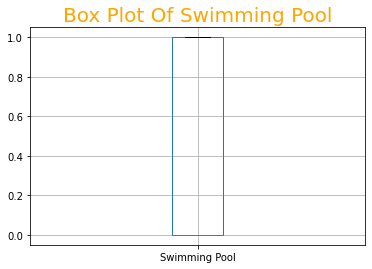

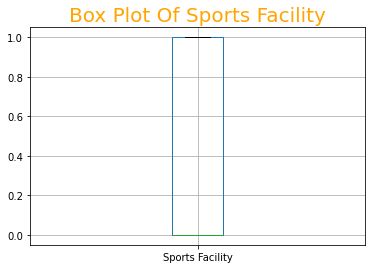

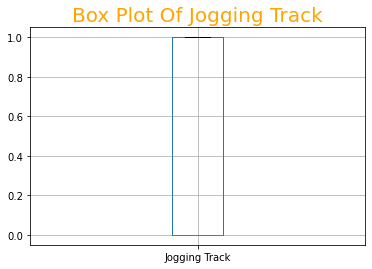

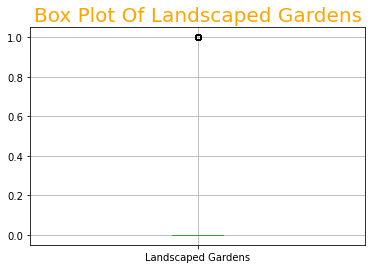

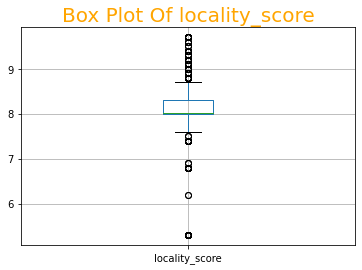

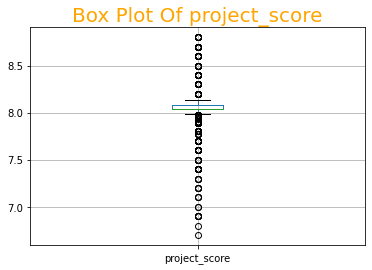

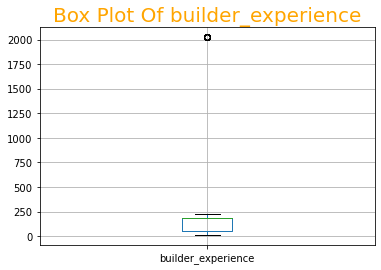

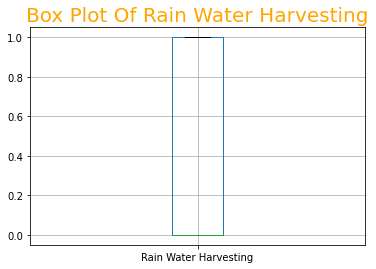

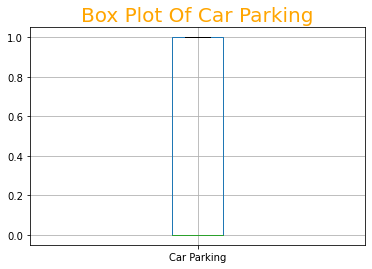

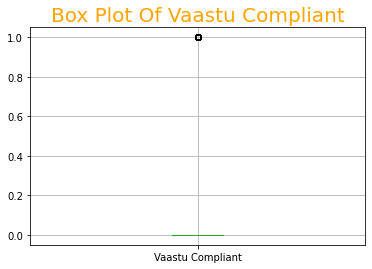

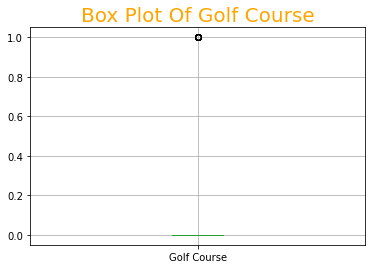

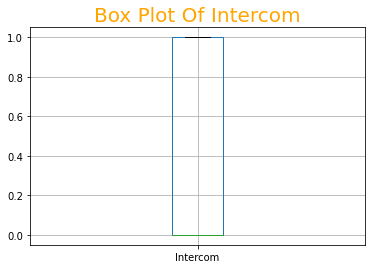

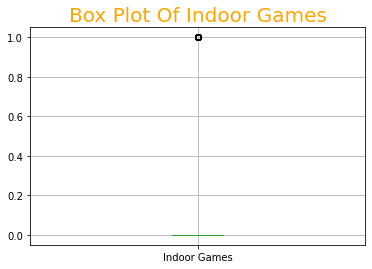

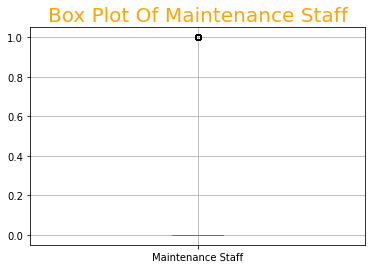

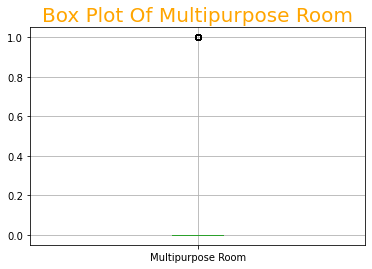

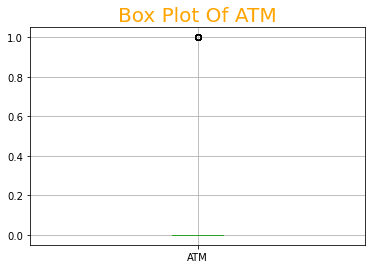

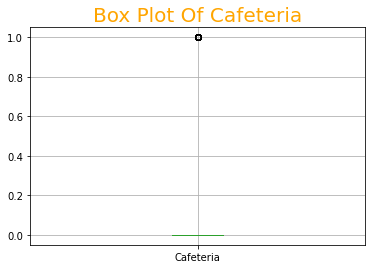

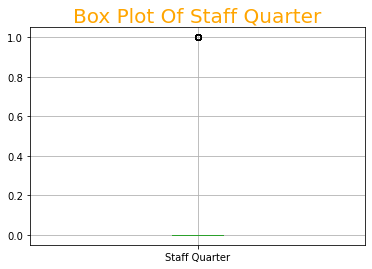

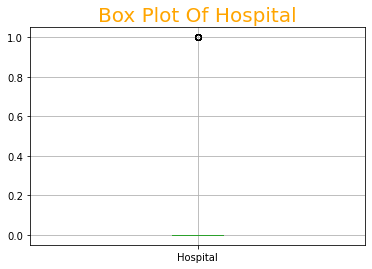

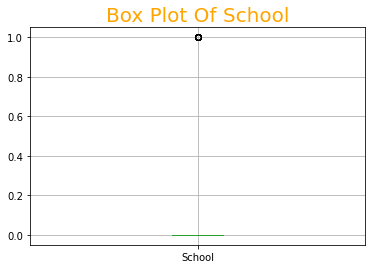

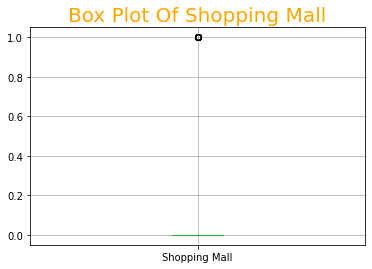

In [13]:
# boxplot all the numerical columns and see if there any outliers

for i in df.drop(['location','price_currency','description','facing'],axis=1).iloc[:, 2:].columns:
    df.iloc[:, 1:].boxplot(column=i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="orange")
    plt.show()

## Creating a countplot for location
#### The countplot shows the count of each location. Lohegaon, wagholi, maval and bavdahn have the highest counts.

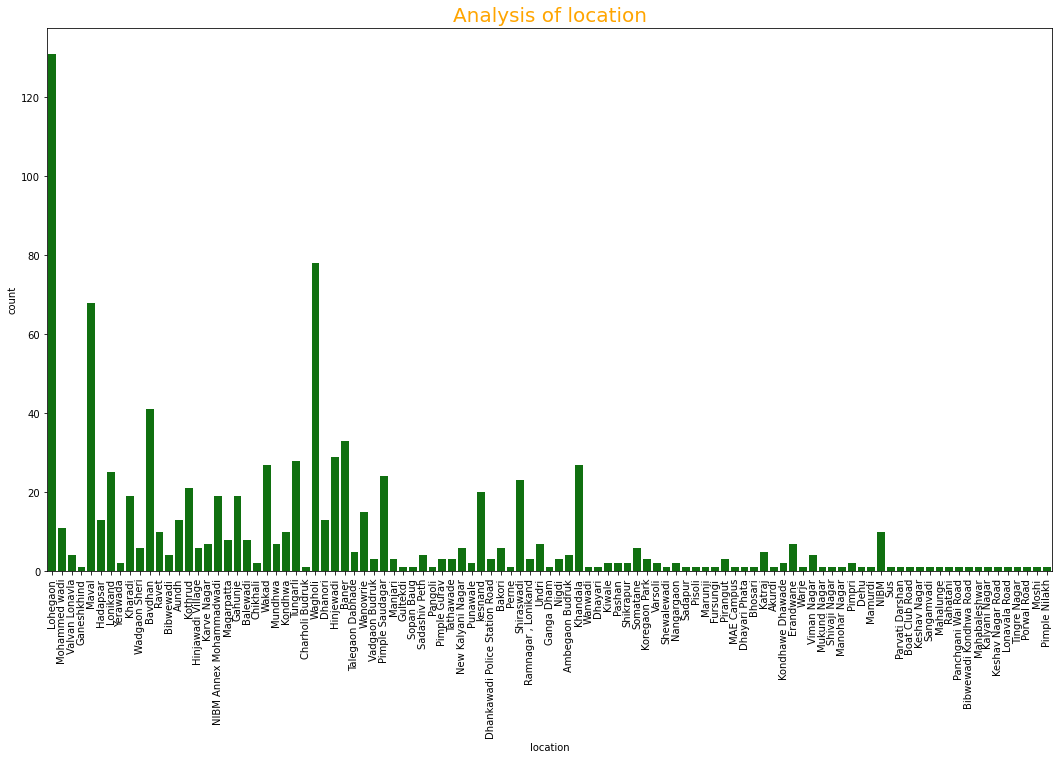

In [14]:
plt.figure(figsize=(18,10))
sns.countplot(df['location'],color='green')
plt.title(f"Analysis of location" , fontsize=20,
          color="orange")
plt.xticks(rotation=90);

## Creating a distribution plot for area
#### The distribution plot shows the distribution and skewness. From the distplot we can see the area is rightly skewed with a value of 1.69 and from the other distplot we saw that 4 rows have an area greater than 9000

Skewness is : 1.6798244071303055


Text(0.5, 1.0, 'Analysis of Area - Skweness')

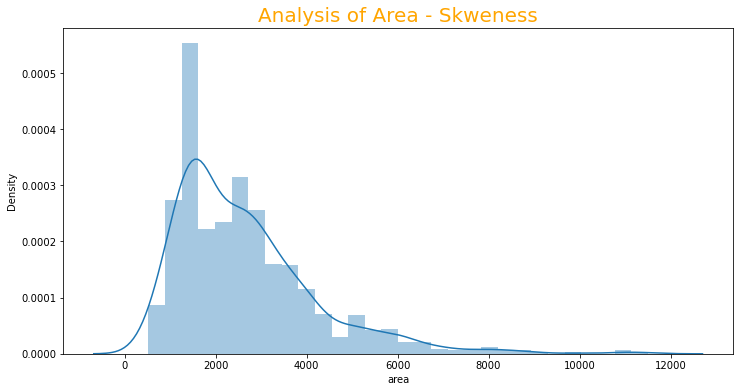

In [15]:
#Data is skewed as visible from plot, as its skewed to the right
plt.figure(figsize=(12,6))
print("Skewness is :",df.area.skew())
sns.distplot(df.area)
df.area.describe()
plt.title(f"Analysis of Area - Skweness" , fontsize=20,
          color="orange")

In [16]:
# checking the no. of data points with area greater than 9000
df[df['area']>9000]

,location,area,price,price_currency,status,new/resale,price_negotiable,description,facing,furnished,...,Intercom,Indoor Games,Maintenance Staff,Multipurpose Room,ATM,Cafeteria,Staff Quarter,Hospital,School,Shopping Mall
48,Magarpatta,10000,130000000,INR,1.0,0,0,A spacious 8 bhk villa is available for sale i...,unknown,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,Tungarli,11000,60000000,INR,0.0,0,0,Well designed 6 bhk villa is available at a pr...,northeast,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
805,Khandala,11500,200000000,INR,0.0,0,1,Well designed 7 bhk villa is available at a pr...,east,0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
896,Valvan Lonavla,11000,70000000,INR,0.0,0,1,It’s a 6 bhk villa situated in Valvan Lonavla....,east,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating a distribution plot for price
#### The distribution plot shows the distribution and skewness. From the distplot we can see the area is rightly skewed with a value of 3.45.

Skewness is : 3.446796049159059


Text(0.5, 1.0, 'Analysis of Price - Skweness')

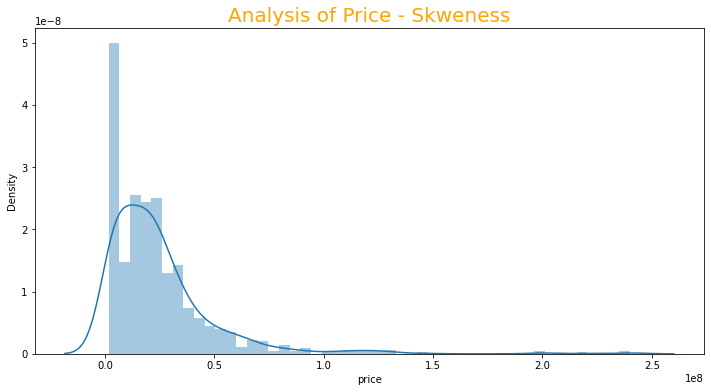

In [17]:
#Data is skewed as visible from plot, as its skewed to the right
plt.figure(figsize=(12,6))
print("Skewness is :",df.price.skew())
sns.distplot(df.price)
df.price.describe()
plt.title(f"Analysis of Price - Skweness" , fontsize=20,
          color="orange")

## Creating a countplot for facing
#### The countplot shows the count of each facing. The east has the highest count followed by the unknown column. The unknown column shows that the rows are not labeled

Text(0.5, 1.0, 'Analysis of facing')

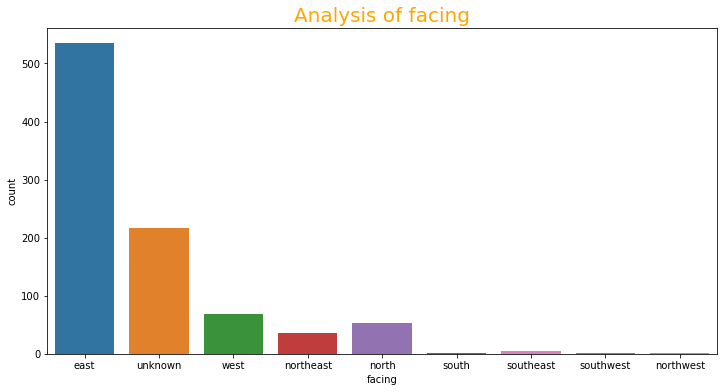

In [18]:
plt.figure(figsize=(12,6))
sns.countplot('facing',data=df)
plt.title(f"Analysis of facing" , fontsize=20,
          color="orange")

## Creating a countplot for age of property
#### The countplot shows the count of age of property. 
#### From the countplot below most of villas are under a year, meaning they are quite new. Also there is a villa which is 122 years, it might be an outlier as we've seen before using the boxplot.

Text(0.5, 1.0, 'Analysis of age of property')

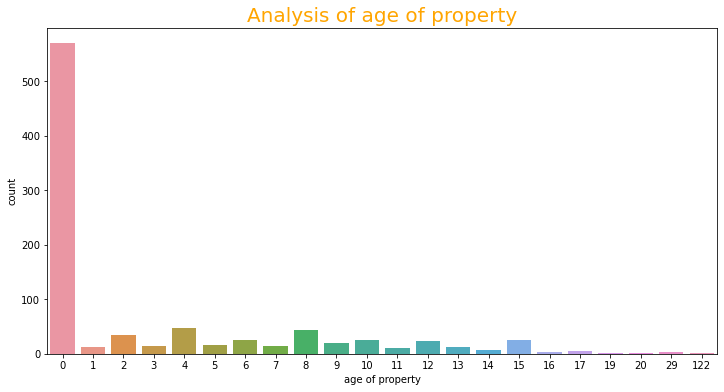

In [19]:
plt.figure(figsize=(12,6))
sns.countplot('age of property',data=df)
plt.title(f"Analysis of age of property" , fontsize=20,
          color="orange")

## Creating a distribution plot for locality score
#### The distribution plot shows the distribution and skewness. From the distplot we can see the locality score has almost a normal distribution with a skewness of negative 1.37

Skewness is : -1.3706736591442539


Text(0.5, 1.0, 'Analysis of Locality score - Skweness')

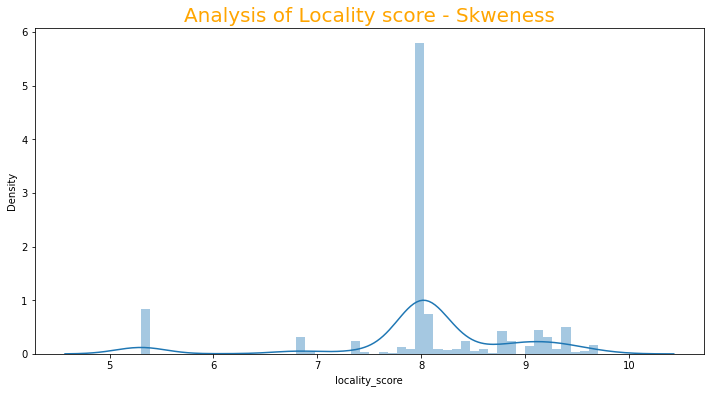

In [20]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(12,6))
print("Skewness is :",df.locality_score.skew())
sns.distplot(df.locality_score)
df.locality_score.describe()
plt.title(f"Analysis of Locality score - Skweness" , fontsize=20,
          color="orange")

## Creating a distribution plot for project score
#### The distribution plot shows the distribution and skewness. From the distplot we can see the project score is almost a normal distribution with skewness of negative 0.75

Skewness is : -0.7508526031710991


Text(0.5, 1.0, 'Analysis of Project score - Skweness')

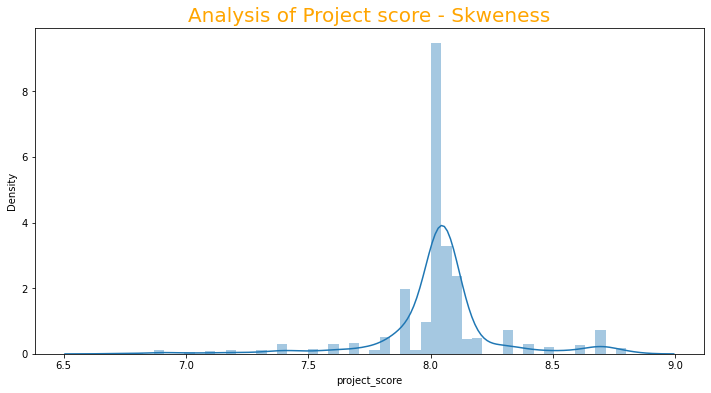

In [21]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(12,6))
print("Skewness is :",df.project_score.skew())
sns.distplot(df.project_score)
df.project_score.describe()
plt.title(f"Analysis of Project score - Skweness" , fontsize=20,
          color="orange")

## Creating a distribution plot for builder experience
#### The distribution plot shows the distribution and skewness. From the distplot we can see the builder experience is rightly skewed with a value of 5.17. Also it's confirming the boxplot we saw earlier that shows an outlier in the 2000 mark

Skewness is : 5.172789603406742


Text(0.5, 1.0, 'Analysis of Builder Experience - Skweness')

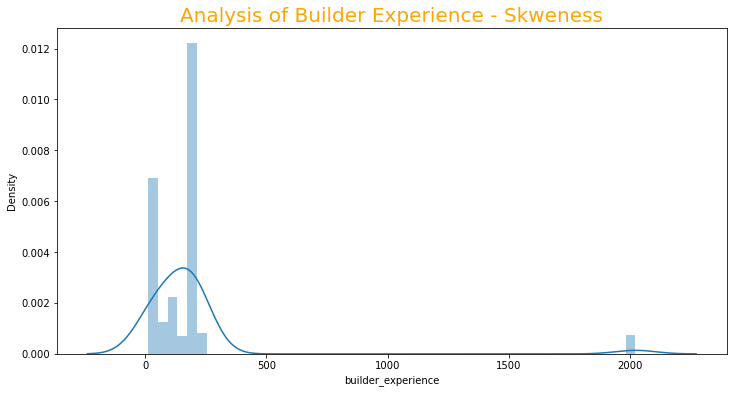

In [22]:
#Data is skewed as visible from plot, as its skewed to the right
plt.figure(figsize=(12,6))
print("Skewness is :",df.builder_experience.skew())
sns.distplot(df.builder_experience)
df.builder_experience.describe()
plt.title(f"Analysis of Builder Experience - Skweness" , fontsize=20,
          color="orange")

## Creating a countplot for new/resale
#### The countplot shows the count of each new/resale. The label 0 shows a new sale while the label 1 shows a resale, from the countplot more than half of the villas are new sales

Text(0.5, 1.0, 'Analysis of new/resale')

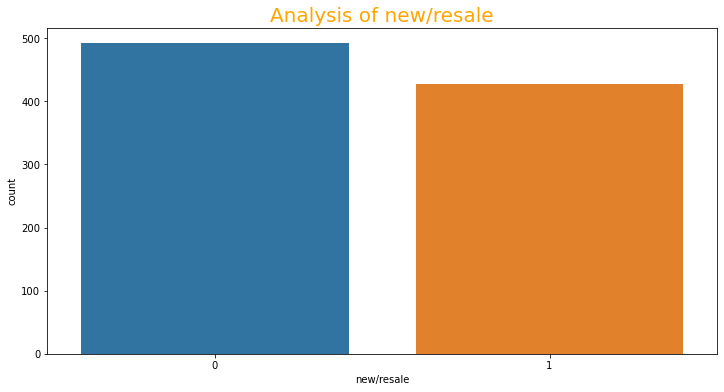

In [23]:
plt.figure(figsize=(12,6))
sns.countplot('new/resale',data=df)
plt.title(f"Analysis of new/resale" , fontsize=20,
          color="orange")

## Creating a countplot for price currency
#### The countplot shows the count of each price currency. The plot shows only one currency which is INR meaning indian rupee

Text(0.5, 1.0, 'Analysis of price currency')

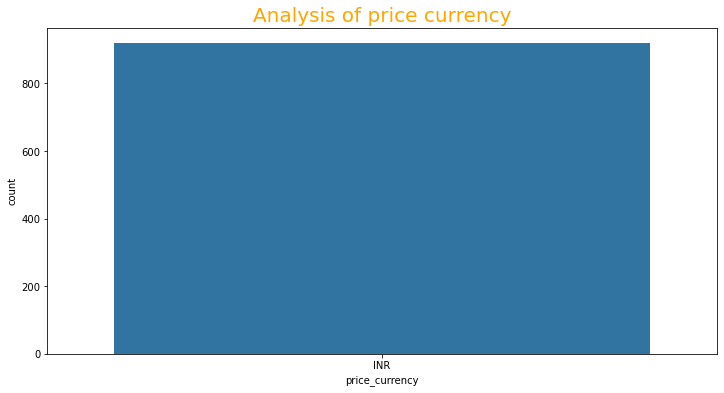

In [24]:
plt.figure(figsize=(12,6))
sns.countplot("price_currency",data=df)
plt.title(f"Analysis of price currency" , fontsize=20,
          color="orange")

## Creating a countplot for price negotiable
#### The countplot shows the count of each villa whether the price is negotiable. The label 0 shows the price is non negotiable and label 1 shows a negotiable price. From the plot 96% of all the villas are non negotiable

Text(0.5, 1.0, 'price negotiable')

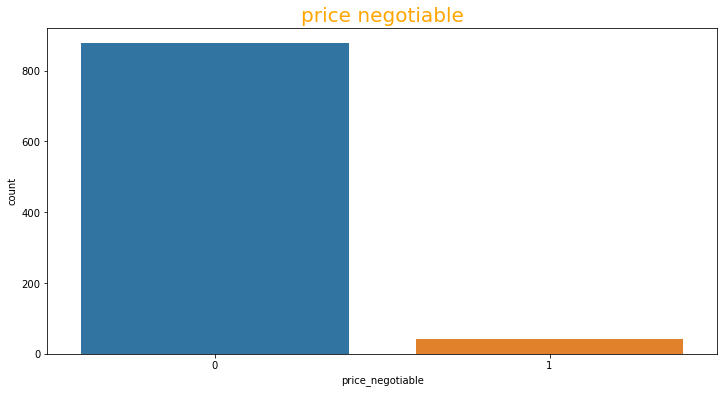

In [25]:
plt.figure(figsize=(12,6))
sns.countplot("price_negotiable",data=df)
plt.title(f"price negotiable" , fontsize=20,
          color="orange")

## Creating a countplot for status
#### The countplot shows the count of each villa status. The label 0 shows the villa is not ready and the label 1 shows the villa is ready. From the plot below 87% of the villas are not ready

Text(0.5, 1.0, 'Analysis of status')

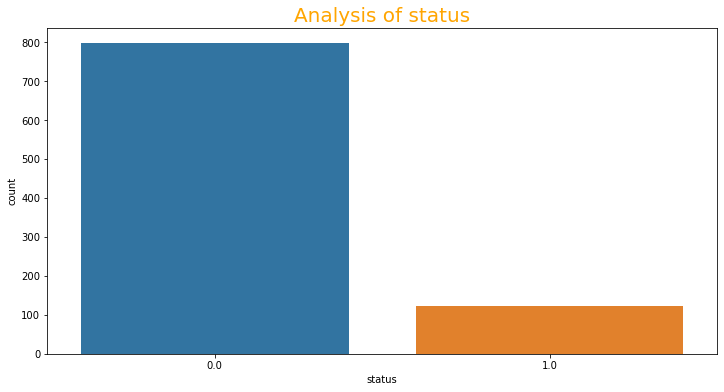

In [26]:
plt.figure(figsize=(12,6))
sns.countplot("status",data=df)
plt.title(f"Analysis of status" , fontsize=20,
          color="orange")

## Creating a countplot for furnished
#### The countplot shows the count whether a villa is furnished or not. The label 0 shows the villa is not furnished and the label 1 shows the villa is furnished, from the countplot 83% of the villas are not furnished.

Text(0.5, 1.0, 'Analysis of furnished')

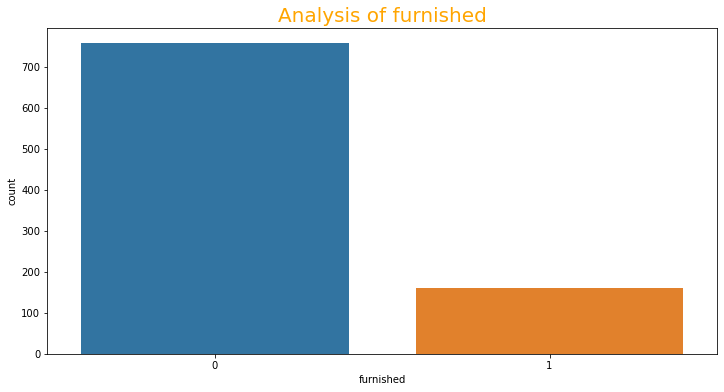

In [27]:
plt.figure(figsize=(12,6))
sns.countplot("furnished",data=df)
plt.title(f"Analysis of furnished" , fontsize=20,
          color="orange")

## Creating a countplot for gymnasium
#### The countplot shows the count of the villas with a gym. The label 0 shows the villa has no gym and the label 1 shows the villa has a gym, from the countplot 53% of the villas have no gym.

Text(0.5, 1.0, 'Analysis of Gymnasium')

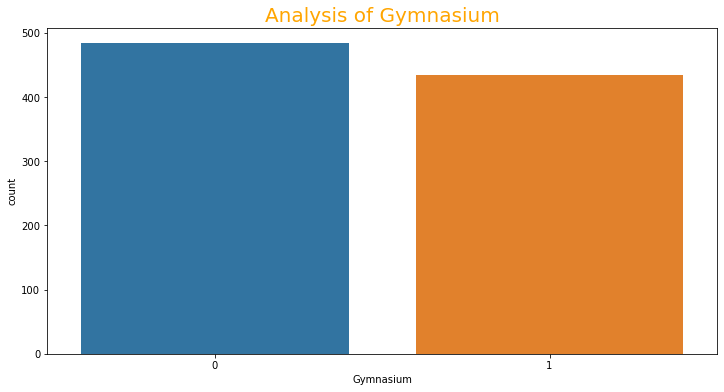

In [28]:
plt.figure(figsize=(12,6))
sns.countplot("Gymnasium",data=df)
plt.title(f"Analysis of Gymnasium" , fontsize=20,
          color="orange")

## Creating a countplot for 24 X 7 Security
#### The countplot shows the count of the villas with security. The label 0 shows the villa has no 24 X 7 security and the label 1 shows the villa has 24 X 7 security, from the countplot more than 69% of the villas have no 24 X 7 security

Text(0.5, 1.0, 'Analysis of 24 X 7 Security')

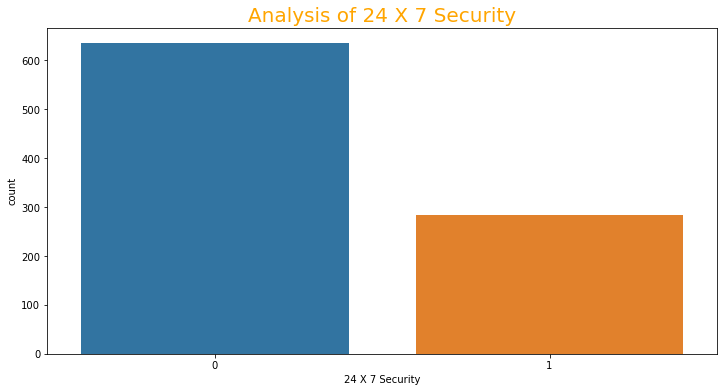

In [29]:
plt.figure(figsize=(12,6))
sns.countplot("24 X 7 Security",data=df)
plt.title(f"Analysis of 24 X 7 Security" , fontsize=20,
          color="orange")

## Creating a countplot for swimming pool
#### The countplot shows the count of the villas with a swimming pool. The label 0 shows the villa has no swimming pool and the label 1 shows the villa has a swimming pool, from the countplot 53% of the villas have no swimming pool

Text(0.5, 1.0, 'Analysis of Swimming Pool')

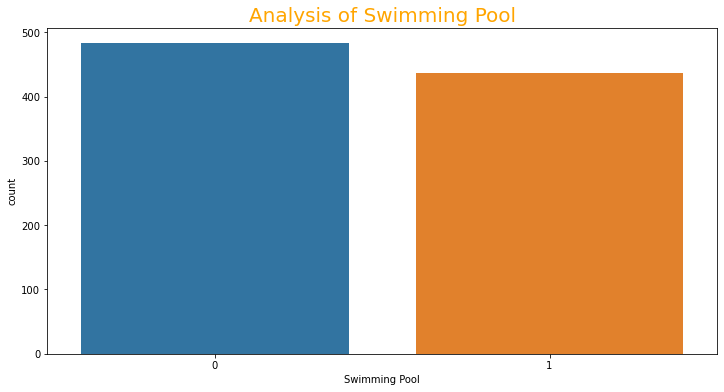

In [30]:
plt.figure(figsize=(12,6))
sns.countplot("Swimming Pool",data=df)
plt.title(f"Analysis of Swimming Pool" , fontsize=20,
          color="orange")

## Creating a countplot for lift(s)
#### The countplot shows the count of the villas with a lift. The label 0 shows the villa has no lift and the label 1 shows the villa has a lift, from the countplot 62% of the villas have no lift

Text(0.5, 1.0, 'Analysis of Lift(s)')

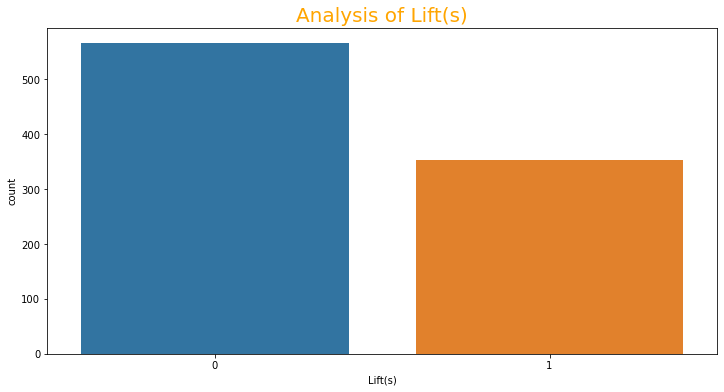

In [31]:
plt.figure(figsize=(12,6))
sns.countplot("Lift(s)",data=df)
plt.title(f"Analysis of Lift(s)" , fontsize=20,
          color="orange")

## Creating a countplot for jogging track
#### The countplot shows the count of the villas with a jogging track. The label 0 shows the villa has a no jogging track and the label 1 shows the villa has a jogging track, from the countplot 71% of the villas have no jogging track

Text(0.5, 1.0, 'Analysis of Jogging Track')

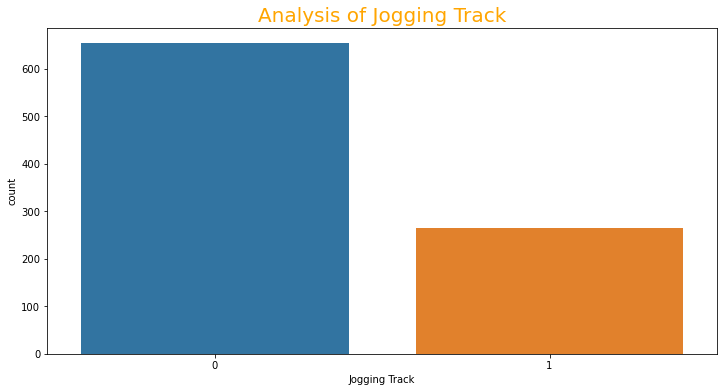

In [32]:
plt.figure(figsize=(12,6))
sns.countplot("Jogging Track",data=df)
plt.title(f"Analysis of Jogging Track" , fontsize=20,
          color="orange")

## Creating a countplot for club house
#### The countplot shows the count of the villas with a club house. The label 0 shows the villa has no club house and the label 1 shows the villa has a club house, from the countplot 52% of the villas have no club house

Text(0.5, 1.0, 'Analysis of Club House')

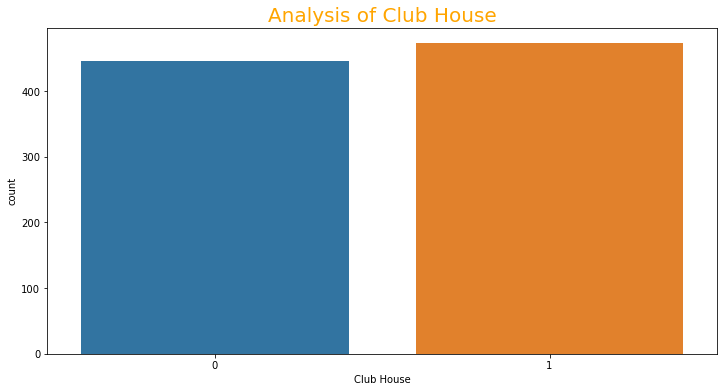

In [33]:
plt.figure(figsize=(12,6))
sns.countplot("Club House",data=df)
plt.title(f"Analysis of Club House" , fontsize=20,
          color="orange")

## Creating a countplot for landscaped gardens
#### The countplot shows the count of the villas with a landscape garden. The label 0 shows the villa has no landscape garden and the label 1 shows the villa has a landscape garden, from the countplot 89% of the villas have no garden

Text(0.5, 1.0, 'Analysis of Landscaped Gardens')

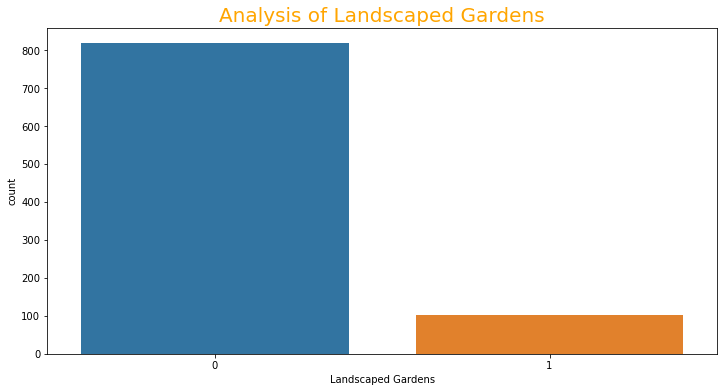

In [34]:
plt.figure(figsize=(12,6))
sns.countplot("Landscaped Gardens",data=df)
plt.title(f"Analysis of Landscaped Gardens" , fontsize=20,
          color="orange")

## Creating a countplot for children's play area
#### The countplot shows the count of the villas with a play area for kids. The label 0 shows the villa has no play area and the label 1 shows the villa has a play area, from the countplot 71% of the villas have no play area

Text(0.5, 1.0, "Analysis of Children's play area")

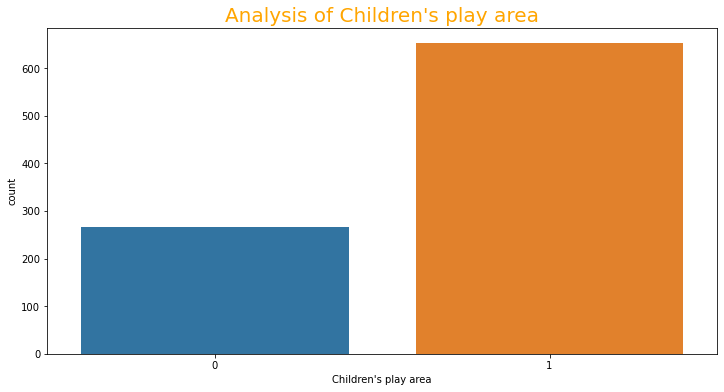

In [35]:
plt.figure(figsize=(12,6))
sns.countplot("Children's play area",data=df)
plt.title(f"Analysis of Children's play area" , fontsize=20,
          color="orange")

## Creating a countplot for sports facility
#### The countplot shows the count of the villas with a sports facility. The label 0 shows the villa has no sport facility and the label 1 shows the villa has a sport facility, from the countplot 60% of the villas have no sport facility

Text(0.5, 1.0, 'Analysis of Sports Facility')

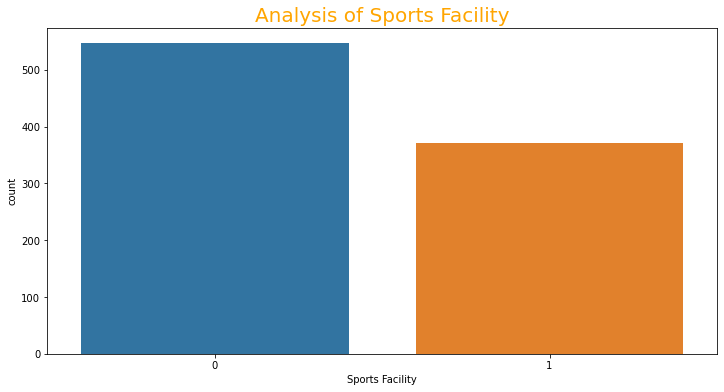

In [36]:
plt.figure(figsize=(12,6))
sns.countplot("Sports Facility",data=df)
plt.title(f"Analysis of Sports Facility" , fontsize=20,
          color="orange")

## Creating a countplot for car parking
#### The countplot shows the count of the villas with a car parking space. The label 0 shows the villa has no parking space and the label 1 shows the villa has a parking space, from the countplot 67% of the villas have no car parking

Text(0.5, 1.0, 'Analysis of Car Parking')

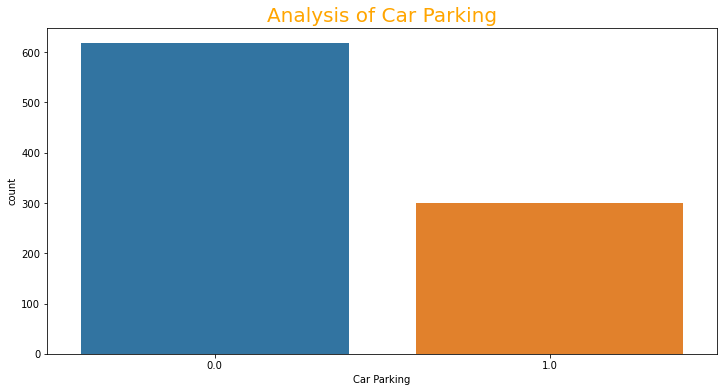

In [37]:
plt.figure(figsize=(12,6))
sns.countplot("Car Parking",data=df)
plt.title(f"Analysis of Car Parking" , fontsize=20,
          color="orange")

## Creating a countplot for full power backup
#### The countplot shows the count of the villas with a full power backup. The label 0 shows the villa has no full power backup and the label 1 shows the villa has a full power backup, from the countplot 37% of the villas have no power backup

Text(0.5, 1.0, 'Analysis of Full Power Backup')

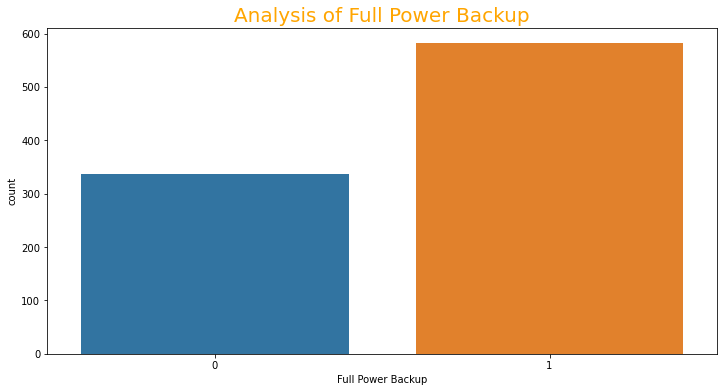

In [38]:
plt.figure(figsize=(12,6))
sns.countplot('Full Power Backup',data=df)
plt.title(f"Analysis of Full Power Backup" , fontsize=20,
          color="orange")

## Creating a countplot for indoor games
#### The countplot shows the count of the villas with a gym. The label 0 shows the villa has no indoor games and the label 1 shows the villa has indoor games, from the countplot 83% of the villas have no indoor games

Text(0.5, 1.0, 'Analysis of Indoor Games')

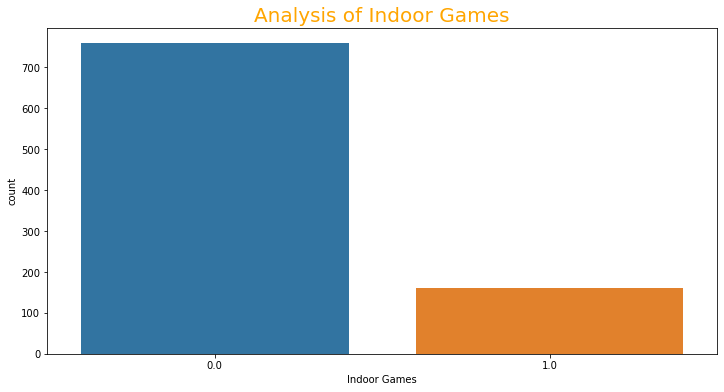

In [39]:
plt.figure(figsize=(12,6))
sns.countplot('Indoor Games',data=df)
plt.title(f"Analysis of Indoor Games" , fontsize=20,
          color="orange")

## Creating a countplot for Intercom
#### The countplot shows the count of the villas with an intercom. The label 0 shows the villa has no intercom and the label 1 shows the villa has intercom, from the countplot 53% of the villas have no intercom

Text(0.5, 1.0, 'Analysis of Intercom')

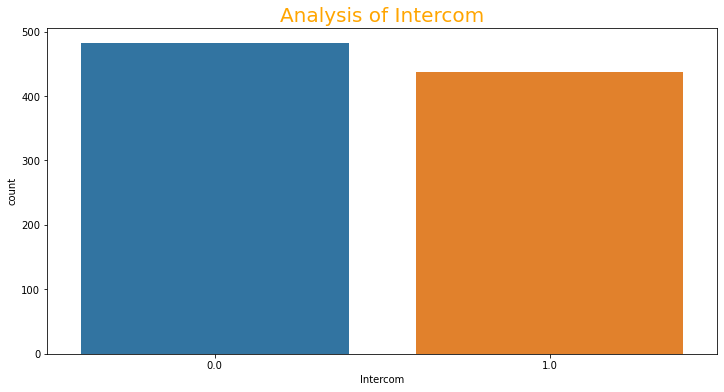

In [40]:
plt.figure(figsize=(12,6))
sns.countplot('Intercom',data=df)
plt.title(f"Analysis of Intercom" , fontsize=20,
          color="orange")

## Creating a countplot for maintenance staff
#### The countplot shows the count of the villas with maintenance staff. The label 0 shows the villa has no maintenance staff and the label 1 shows the villa has maintenance staff, from the countplot 90% of the villas have no maintenance staff

Text(0.5, 1.0, 'Analysis of Maintenance Staff')

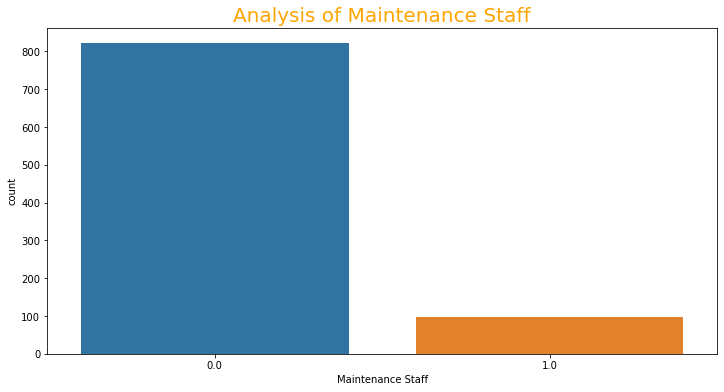

In [41]:
plt.figure(figsize=(12,6))
sns.countplot('Maintenance Staff',data=df)
plt.title(f"Analysis of Maintenance Staff" , fontsize=20,
          color="orange")

## Creating a countplot for shopping mall
#### The countplot shows the count of the villas with shopping mall. The label 0 shows the villa has no shopping mall and the label 1 shows the villa has shopping mall, from the countplot 96% of the villas have no shopping mall

Text(0.5, 1.0, 'Analysis of Shopping Mall')

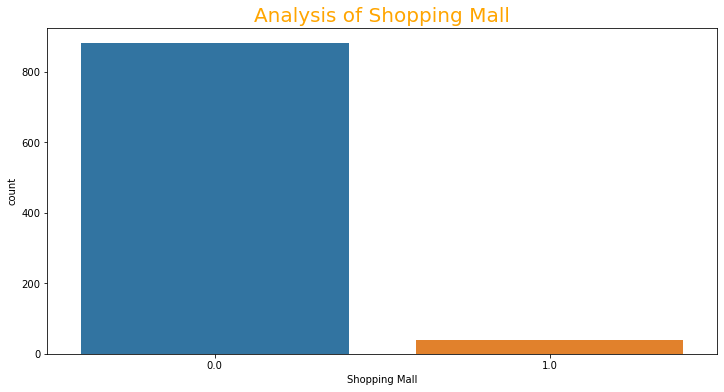

In [42]:
plt.figure(figsize=(12,6))
sns.countplot('Shopping Mall',data=df)
plt.title(f"Analysis of Shopping Mall" , fontsize=20,
          color="orange")

## Creating a countplot for cafeteria
#### The countplot shows the count of the villas with a cafeteria. The label 0 shows the villa has no cafeteria and the label 1 shows the villa has a cafeteria, from the countplot 93% of the villas have no cafeteria

Text(0.5, 1.0, 'Analysis of Cafeteria')

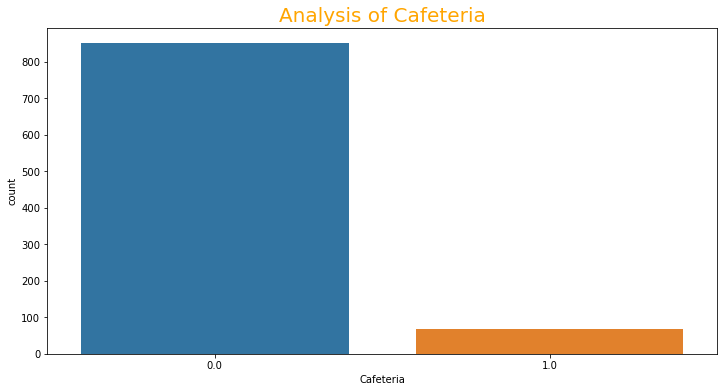

In [43]:
plt.figure(figsize=(12,6))
sns.countplot('Cafeteria',data=df)
plt.title(f"Analysis of Cafeteria" , fontsize=20,
          color="orange")

## Creating a countplot for ATM
#### The countplot shows the count of the villas with an ATM. The label 0 shows the villa has no ATM and the label 1 shows the villa has a ATM, from the countplot 95% of the villas have no ATM

Text(0.5, 1.0, 'Analysis of ATM')

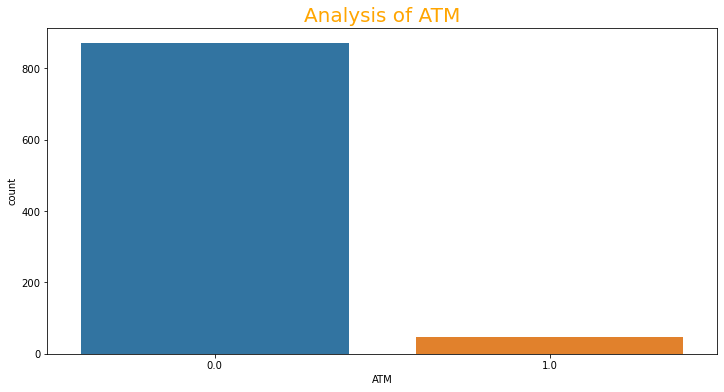

In [44]:
plt.figure(figsize=(12,6))
sns.countplot('ATM',data=df)
plt.title(f"Analysis of ATM" , fontsize=20,
          color="orange")

## Creating a countplot for Multipurpose room
#### The countplot shows the count of the villas with a multipurpose room. The label 0 shows the villa has no multipurpose room and the label 1 shows the villa has a multipurpose room, from the countplot 86% of the villas have no multipurpose room

Text(0.5, 1.0, 'Analysis of Multipurpose Room')

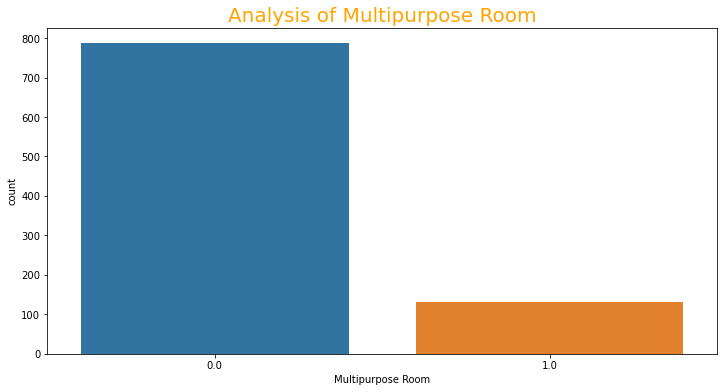

In [45]:
plt.figure(figsize=(12,6))
sns.countplot('Multipurpose Room',data=df)
plt.title(f"Analysis of Multipurpose Room" , fontsize=20,
          color="orange")

## Creating a countplot for school
#### The countplot shows the count of the villas with a school. The label 0 shows the villa has no school and the label 1 shows the villa has a school, from the countplot 97% of the villas have no school

Text(0.5, 1.0, 'Analysis of School')

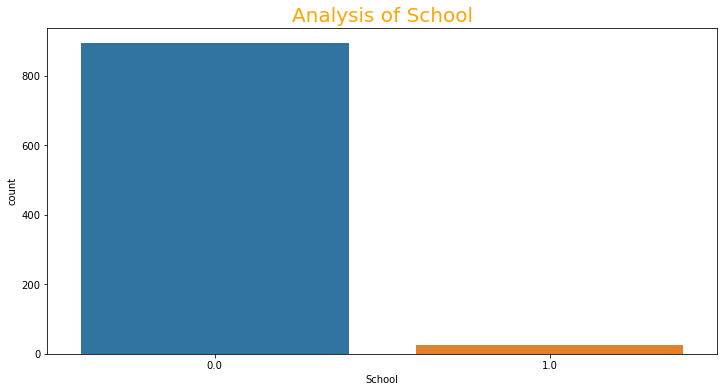

In [46]:
plt.figure(figsize=(12,6))
sns.countplot('School',data=df)
plt.title(f"Analysis of School" , fontsize=20,
          color="orange")

## Creating a countplot for hospital
#### The countplot shows the count of the villas with a hospital. The label 0 shows the villa has no hospital and the label 1 shows the villa has a hospital, from the countplot 97% of the villas have no hospital

Text(0.5, 1.0, 'Analysis of Hospital')

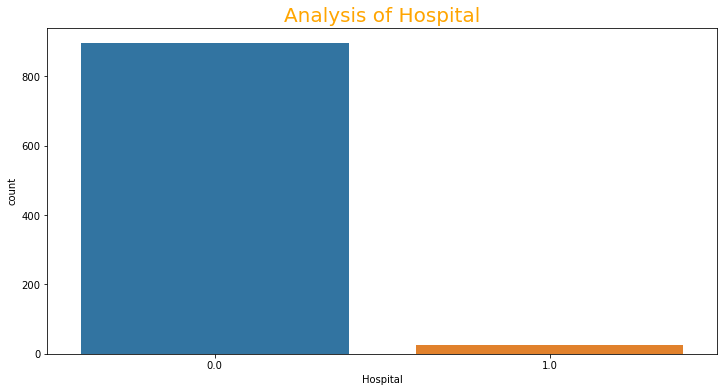

In [47]:
plt.figure(figsize=(12,6))
sns.countplot('Hospital',data=df)
plt.title(f"Analysis of Hospital" , fontsize=20,
          color="orange")

## Creating a countplot for golf course
#### The countplot shows the count of the villas with a golf course. The label 0 shows the villa has no golf course and the label 1 shows the villa has a golf course, from the countplot 96% of the villas have no golf course

Text(0.5, 1.0, 'Analysis of Golf Course')

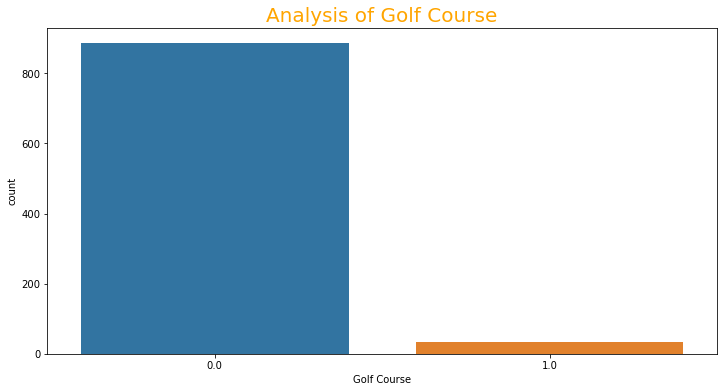

In [48]:
plt.figure(figsize=(12,6))
sns.countplot('Golf Course',data=df)
plt.title(f"Analysis of Golf Course" , fontsize=20,
          color="orange")

## Creating a countplot for staff quarter
#### The countplot shows the count of the villas with a staff quarter. The label 0 shows the villa has no staff quarter and the label 1 shows the villa has a staff quarter, from the countplot 93% of the villas have no staff quarter

Text(0.5, 1.0, 'Analysis of Staff Quarter')

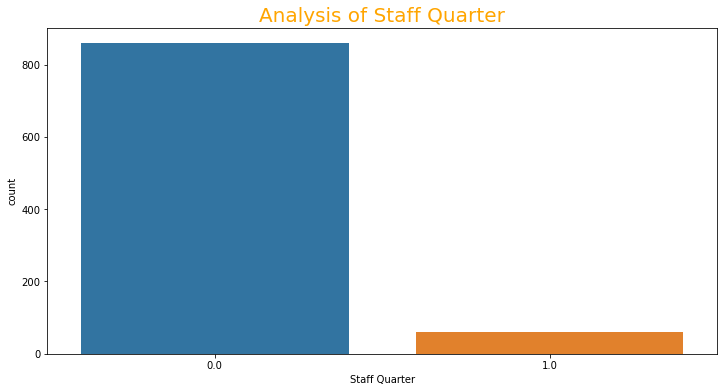

In [49]:
plt.figure(figsize=(12,6))
sns.countplot('Staff Quarter',data=df)
plt.title(f"Analysis of Staff Quarter" , fontsize=20,
          color="orange")

# Bivariate Analysis
Bivariate analysis involves the analysis of two variables , for the purpose of determining the emperical relationship between them.

## Creating a pairplot for the dataframe
The pairplot shows the relationship between each and every variable with each other

Text(0.5, 1.0, 'Pairplot')

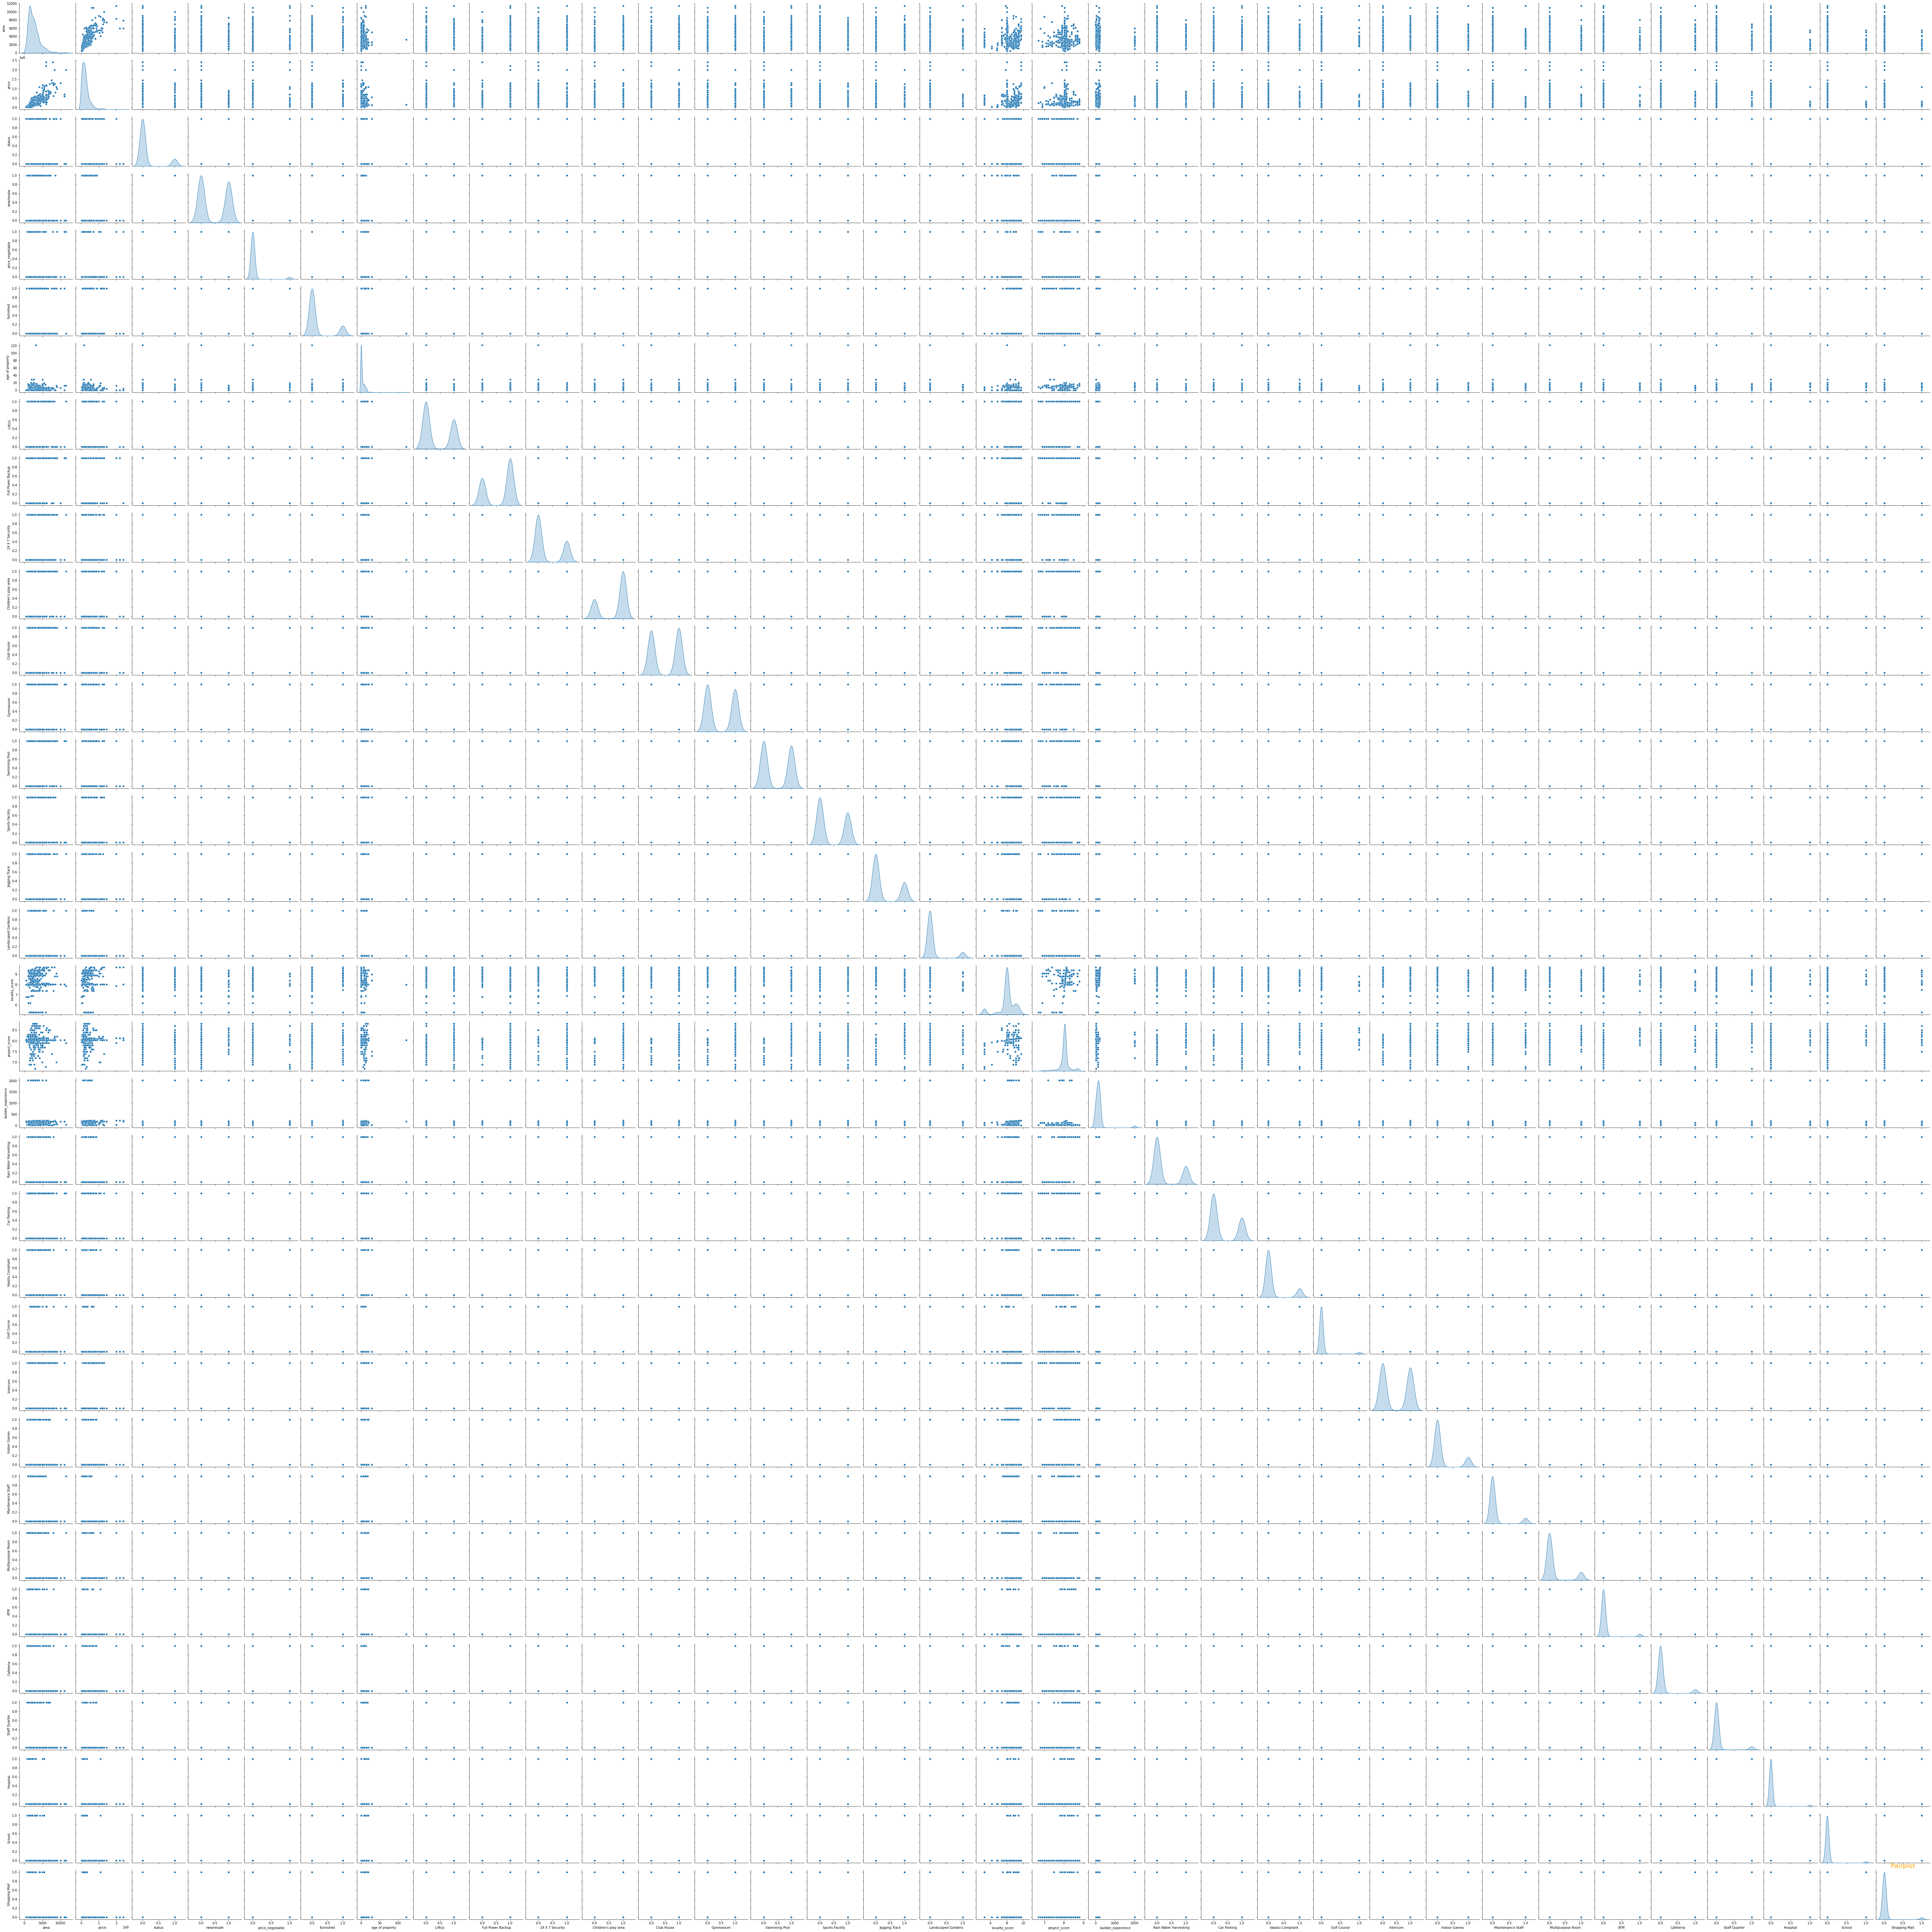

In [50]:
# plot all the variables and confirm our above deduction with more confidence
sns.pairplot(df, diag_kind = 'kde')
plt.title(f"Pairplot" , fontsize=20,
          color="orange")

From above pair plot, we observed/deduced below 

<ol>
    <li><b>price:</b> price distribution is Right-Skewed</li>
    <li><b>area:</b> area distribution is Right-Skewed</li>
    <li><b>new/resale: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>status: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>price_negotiable: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>age of property: No clear relationship</b> with price or any other feature.</b></li>
    <li><b>lift: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>full power backup: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>24 X 7 security: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>childrens play area: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>club house: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>gymnasium: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>swimming pool: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>sports facility: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>builder experience: No clear relationship</b> with price or any other feature.</b></li>
    <li><b>jogging track: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>locality score: Its plot with price has <b>no linear relationship</b>. Distribution has number of gaussians/b></li>
    <li><b>project score: Its plot with price has <b>no linear relationship</b>. Distribution has number of gaussians</b></li>
    <li><b>landscape gardens: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>rain water harvesting: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>car parking: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>vaastu compliant: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>shopping mall: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>school: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>hospital: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>cafeteria: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>staff quarter: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>ATM: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>multipurpose room: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>maintenance room: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>indoor games: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>intercom: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>Golf course: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    </ol>

## Creating a correlation for the dataframe
Correlation is primarily concerned with finding out whether a relationship exists between variables and then determining the magnitude and action of that relationship.

In [51]:
# corelatoin between the different features
corr = df.corr(method ='pearson')
corr

,area,price,status,new/resale,price_negotiable,furnished,age of property,Lift(s),Full Power Backup,24 X 7 Security,...,Intercom,Indoor Games,Maintenance Staff,Multipurpose Room,ATM,Cafeteria,Staff Quarter,Hospital,School,Shopping Mall
area,1.000000,0.793453,0.097484,-0.307463,0.102195,0.170988,0.140596,0.205812,0.254673,0.190184,...,0.315960,0.162077,0.065576,0.102418,0.034531,0.164943,0.065662,-0.033823,-0.027773,-0.026709
price,0.793453,1.000000,0.112521,-0.318050,0.076041,0.173623,0.093551,0.127169,0.180562,0.088652,...,0.204398,0.074818,0.039846,0.009506,0.024413,0.108878,0.028044,-0.009604,-0.014931,-0.011668
status,0.097484,0.112521,1.000000,-0.223027,0.114010,0.047470,0.138892,0.014098,0.018219,0.099229,...,-0.000084,0.065624,0.126530,0.040934,-0.005364,-0.000333,-0.012530,0.056585,0.068632,0.063711
new/resale,-0.307463,-0.318050,-0.223027,1.000000,0.025964,-0.331777,-0.377042,-0.085300,-0.205622,-0.198094,...,-0.266692,-0.019227,-0.043098,-0.070493,0.006840,0.145067,-0.069578,-0.029430,-0.027377,-0.051023
price_negotiable,0.102195,0.076041,0.114010,0.025964,1.000000,-0.032321,0.075315,0.020003,-0.049720,0.079163,...,-0.124906,0.036931,0.077445,0.044085,-0.004536,0.097383,0.026531,0.029508,0.088360,0.033062
furnished,0.170988,0.173623,0.047470,-0.331777,-0.032321,1.000000,0.175576,0.059782,0.142794,0.051081,...,0.157295,-0.060622,0.102541,-0.009183,0.020468,-0.119341,0.063600,0.032227,0.024948,0.062439
age of property,0.140596,0.093551,0.138892,-0.377042,0.075315,0.175576,1.000000,0.165719,0.208526,0.399250,...,0.252061,0.170617,0.152893,0.136514,0.092437,-0.031179,0.157386,0.126762,0.122623,0.155056
Lift(s),0.205812,0.127169,0.014098,-0.085300,0.020003,0.059782,0.165719,1.000000,0.452385,0.444985,...,0.569569,0.286389,0.187423,0.346355,0.277147,0.187005,0.316545,0.179299,0.148599,0.229271
Full Power Backup,0.254673,0.180562,0.018219,-0.205622,-0.049720,0.142794,0.208526,0.452385,1.000000,0.455141,...,0.688382,0.313648,0.232003,0.292325,0.168486,0.215101,0.201109,0.110450,0.102605,0.146695
24 X 7 Security,0.190184,0.088652,0.099229,-0.198094,0.079163,0.051081,0.399250,0.444985,0.455141,1.000000,...,0.504312,0.525083,0.352721,0.484819,0.340442,0.197785,0.395191,0.215331,0.226741,0.251413


We have linear relationships in below featues as we got to know from above matrix

<ol>
    <li><b>price</b>: area</li>
    <li><b>area</b>: price.</li>
    <li><b>shopping mall</b>: school, hospital</li>
    <li><b>car parking</b>: jogging track, 24 X 7 security</li>
    <li><b>club house</b>: intercom, sports facility, gymnasium, swimming pool</li>
</ol>

We can plot heatmap and can easily confirm our above findings

## Creating a heatmap plot for the dataframe
Heatmap is a graphical representation of data where values are depicted by color. Also we are using it to confirm the correlation

Text(0.5, 1.0, 'Heatmap')

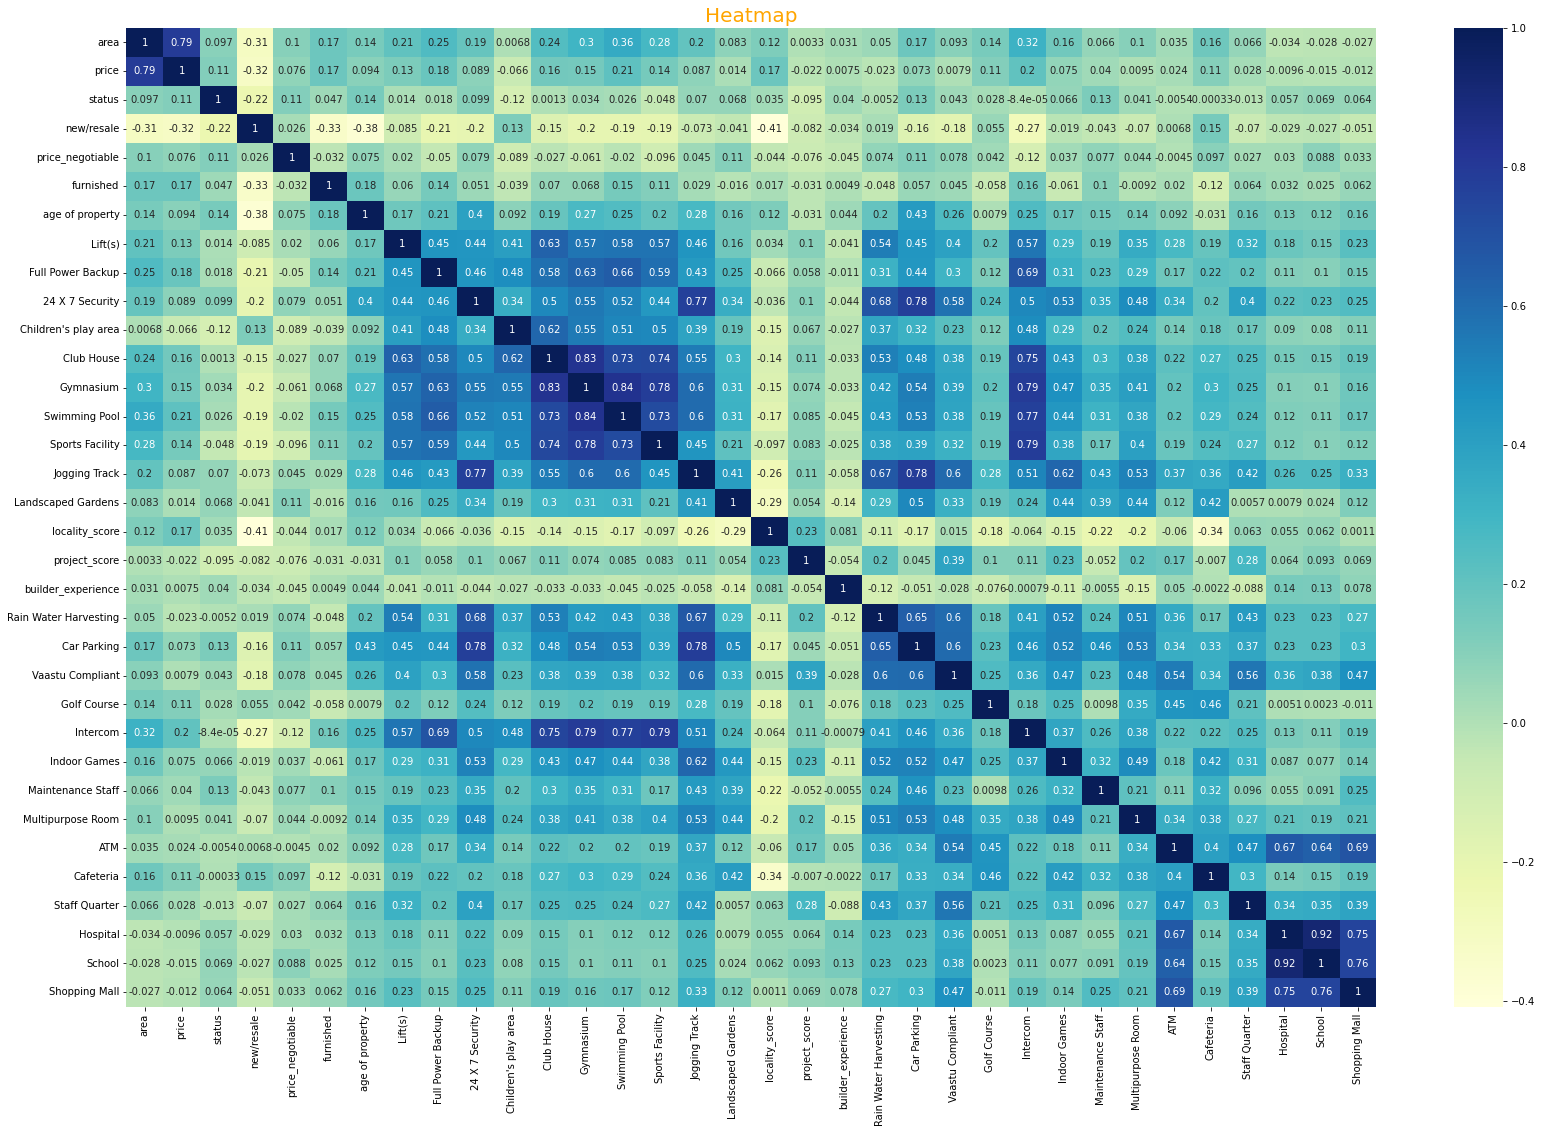

In [52]:
# Plotting heatmap
plt.subplots(figsize =(28, 18)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)
plt.title(f"Heatmap" , fontsize=20,
          color="orange")

## Bivariate analysis of price and age of property
Here we looking at the relationship between price and age of property, from the plot there isn't any real relationship between price and the age of property

,mean,median,size
age of property,,,
0,2.093702e+07,14600000.0,570
1,2.855000e+07,30000000.0,12
2,2.677725e+07,23000000.0,35
3,3.924667e+07,18500000.0,15
4,4.220213e+07,31500000.0,47
5,2.913125e+07,20600000.0,16
6,4.378616e+07,37000000.0,26
7,3.143571e+07,23500000.0,14
8,2.488368e+07,16500000.0,43


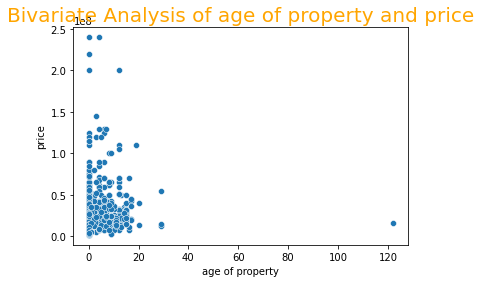

In [53]:
sns.scatterplot(x='age of property',y='price',data=df)
plt.title(f"Bivariate Analysis of age of property and price" , fontsize=20,
          color="orange")
df.groupby('age of property')['price'].agg(['mean','median','size'])

## Bivariate analysis of area and location based on facing
Here we looking at the relationship between area and location, from the plot there isn't any clear relation between them

AxesSubplot(0.125,0.125;0.775x0.755)


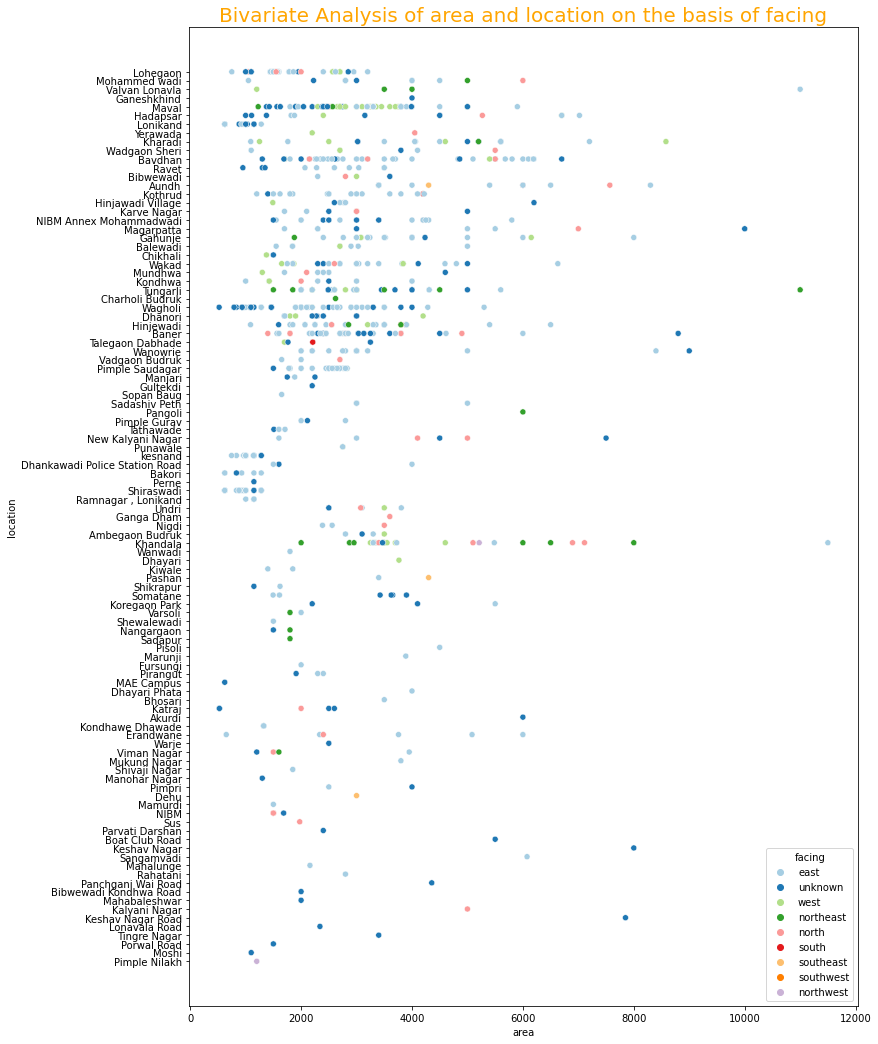

In [54]:
plt.figure(figsize=(12,18))
plt.title(f"Bivariate Analysis of area and location on the basis of facing" , fontsize=20,
          color="orange")
print(sns.scatterplot(df['area'],df['location'],hue=df['facing'],palette='Paired',legend='full'))

## Bivariate analysis of builder experience and price
Here we looking at the relationship between builder experience and price, from the plot there is no relation between them

AxesSubplot(0.125,0.125;0.775x0.755)


count     919.000000
mean      188.124124
std       326.860040
min        12.000000
25%        52.000000
50%       185.944810
75%       186.292709
max      2022.000000
Name: builder_experience, dtype: float64

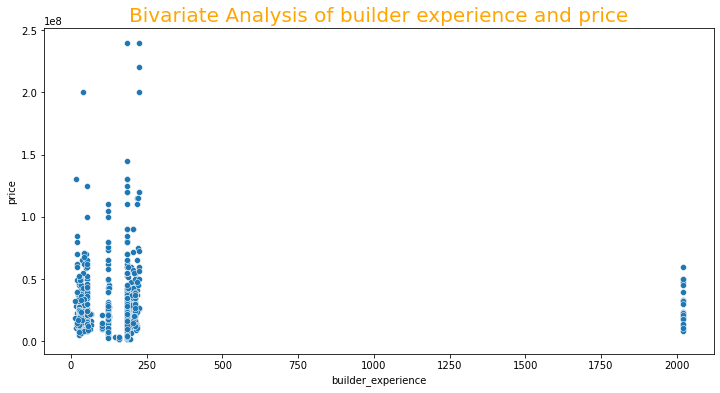

In [55]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['builder_experience'],df['price']))
plt.title(f"Bivariate Analysis of builder experience and price" , fontsize=20,
          color="orange")
df['builder_experience'].describe()

AxesSubplot(0.125,0.125;0.775x0.755)


count    892.000000
mean     132.614428
std       71.260490
min       12.000000
25%       52.000000
50%      185.944810
75%      186.292709
max      223.525639
Name: builder_experience, dtype: float64

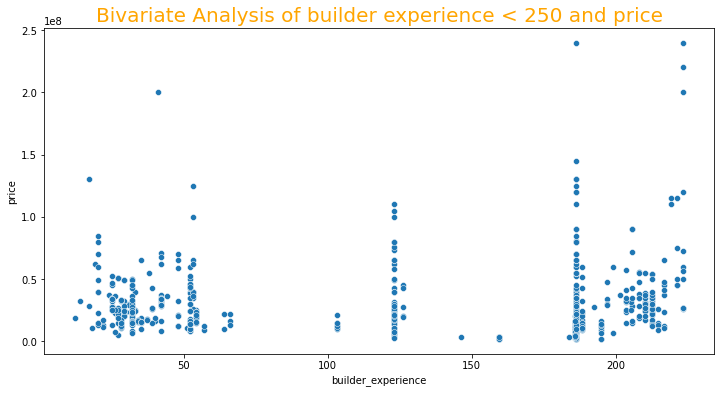

In [56]:
#builder experience <250
plt.figure(figsize=(12,6))
x=df[df['builder_experience']< 250]
print(sns.scatterplot(x['builder_experience'],x['price']))
plt.title(f"Bivariate Analysis of builder experience < 250 and price" , fontsize=20,
          color="orange")
x['builder_experience'].describe()

## Bivariate analysis of locality score and price
Here we looking at the relationship between locality score and price, from the plot there is no relation between them

AxesSubplot(0.125,0.125;0.775x0.755)


count    919.000000
mean       8.023009
std        0.950952
min        5.300000
25%        8.000000
50%        8.015749
75%        8.300000
max        9.700000
Name: locality_score, dtype: float64

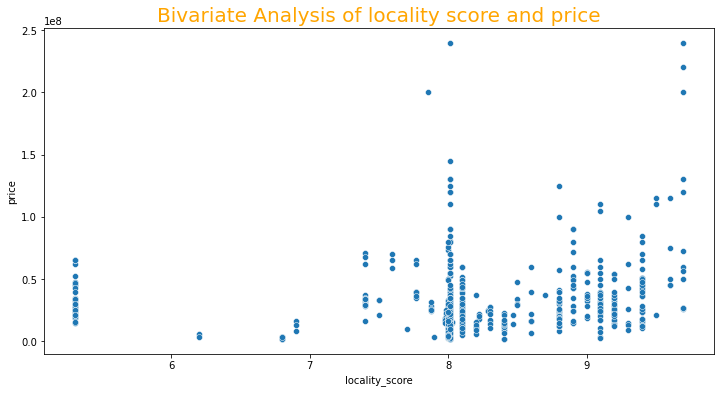

In [57]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['locality_score'],df['price']))
plt.title(f"Bivariate Analysis of locality score and price" , fontsize=20,
          color="orange")
df['locality_score'].describe()

## Bivariate analysis of project score and price
Here we looking at the relationship between project score and price, from the plot there is no relation between them

AxesSubplot(0.125,0.125;0.775x0.755)


count    919.000000
mean       8.036305
std        0.253604
min        6.700000
25%        8.039148
50%        8.040040
75%        8.081644
max        8.800000
Name: project_score, dtype: float64

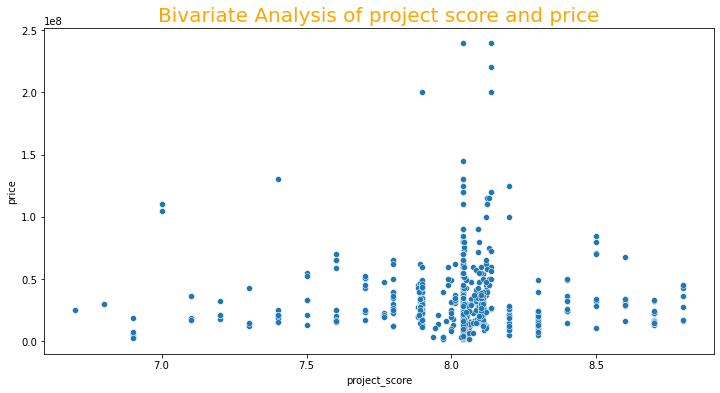

In [58]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['project_score'],df['price']))
plt.title(f"Bivariate Analysis of project score and price" , fontsize=20,
          color="orange")
df['project_score'].describe()

## Bivariate analysis of facing and price
Here we looking at the relationship between facing and price, from the plot there is no relation between them. 

AxesSubplot(0.125,0.125;0.775x0.755)


count      919
unique       9
top       east
freq       535
Name: facing, dtype: object

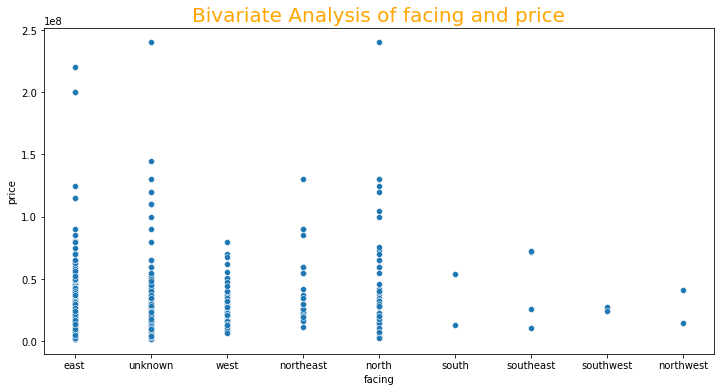

In [59]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['facing'],df['price']))
plt.title(f"Bivariate Analysis of facing and price" , fontsize=20,
          color="orange")
df['facing'].describe()

## Bivariate analysis of area and price
Here we looking at the relationship between area and price, from the plot there is a linear relation between them. As the area increases the price increases.

AxesSubplot(0.125,0.125;0.775x0.755)


count      919.000000
mean      2649.709467
std       1566.465897
min        522.000000
25%       1518.500000
50%       2350.000000
75%       3300.000000
max      11500.000000
Name: area, dtype: float64

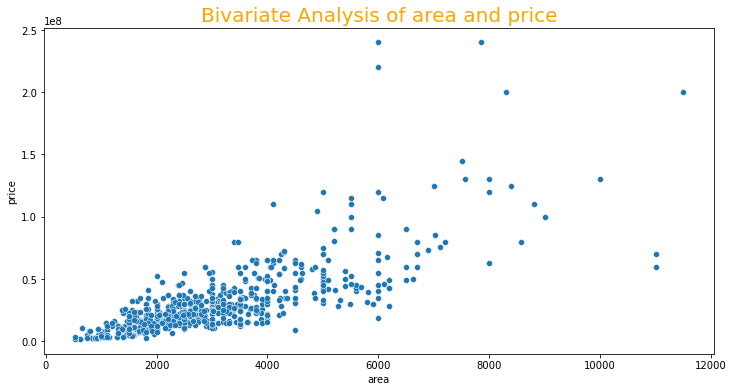

In [62]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['area'],df['price']))
plt.title(f"Bivariate Analysis of area and price" , fontsize=20,
          color="orange")
df['area'].describe()

## Summary
From all the attributes only area has a linear relationship with price, meaning as the area increases the price increases.